# Developer's trends Analysis

## Loading the dataset


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

In [9]:
df=pd.read_csv(dataset_url)

## Exploring the data set


In [5]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [4]:
# Printing the number of rows in the dataset.
df.shape[0]

11552

In [5]:
# Printing the number of columns in the dataset.
df.shape[1]

85

In [6]:
# Printing the datatype of all columns.
print(df.dtypes)

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object


In [16]:
# Printing the mean age of the survey participants.
df['Age'].mean()

30.77239449133718

In [20]:
# Printing how many unique countries are there in the Country column.

df['Country'].value_counts().to_frame().shape[0]

135

# Data Wrangling

In [16]:
# Finding no of duplicate rows in the dataframe.

df.shape[0]-df['Respondent'].value_counts().to_frame().shape[0]

154

In [17]:
# Removing duplicate rows from the dataframe.

df.drop_duplicates(subset='Respondent',keep='first',inplace=True)
df.shape[0]-df['Respondent'].value_counts().to_frame().shape[0]

0

In [19]:
# Finding out number of missing rows in the column 'WorkLoc'
a['WorkLoc'].value_counts()

False    11366
True        32
Name: WorkLoc, dtype: int64

## Imputing missing values

In [21]:
# Finding the value counts for the column WorkLoc
df['WorkLoc'].value_counts()

Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

In [24]:
# Replacing all the empty rows in the column WorkLoc with the identified majority value i.e. 'office'.

df['WorkLoc'].replace(np.nan,'office',inplace=True)
a=df.isnull()
a['WorkLoc'].value_counts()

False    11398
Name: WorkLoc, dtype: int64

## Normalizing data

since there are 2 columns in this dataset that talk about compensation, namely 'CompFreq' and "CompTotal" it's better to combine them in 1 proper column

In [25]:
# Listing out the various categories in the column 'CompFreq'

df['CompFreq'].value_counts().to_frame().index

Index(['Yearly', 'Monthly', 'Weekly'], dtype='object')

In [27]:
# Creating a new column named 'NormalizedAnnualCompensation'.

df[['CompFreq','CompTotal']]
list=[]
for i,a in zip(df.index,df['CompFreq'].tolist()):
    if a=='Yearly':
        b=df['CompTotal'][i]
        list.append(b)
    elif a=='Monthly':
        b=df['CompTotal'][i]*12
        list.append(b)
    elif a=='Weekly':
        b=df['CompTotal'][i]*52
        list.append(b)
    else:
        list.append(np.nan)
df['NormalizedAnnualCompensation']=list
df[['CompFreq','CompTotal','NormalizedAnnualCompensation']].head()

,CompFreq,CompTotal,NormalizedAnnualCompensation
0,Yearly,61000.0,61000.0
1,Yearly,138000.0,138000.0
2,Yearly,90000.0,90000.0
3,Monthly,29000.0,348000.0
4,Yearly,90000.0,90000.0


## Exploratory Data Analysis

### Analysing the distribution of data

C:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

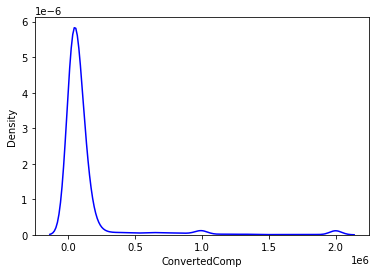

In [30]:
sns.distplot(df['ConvertedComp'],hist=False,color='b')

In [31]:
df['ConvertedComp'].median()

57745.0

In [32]:
# checking for demography
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [33]:
# Finding out the median ConvertedComp of responders who identified themselves only as a Woman

a=df[['Gender','ConvertedComp']]
a.set_index('Gender',inplace=True)
a.loc['Woman'].median()

ConvertedComp    57708.0
dtype: float64

In [34]:
# statistical description of column 'age'

df['Age'].describe().to_frame().astype(int)

,Age
count,11111
mean,30
std,7
min,16
25%,25
50%,29
75%,35
max,99


<AxesSubplot:ylabel='Frequency'>

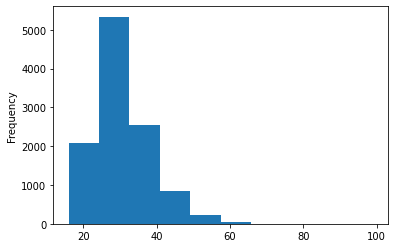

In [35]:
df['Age'].plot(kind='hist')

### Dealing with outliers

<AxesSubplot:ylabel='Age'>

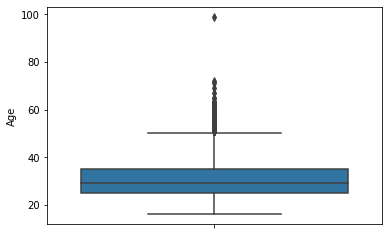

In [37]:
a=df.dropna(subset=['ConvertedComp'],axis=0)
sns.boxplot(y='Age',data=a)

In [41]:
# finding out IQR and upper and lower bounds in order to remove outliers

a=df['ConvertedComp'].describe().to_frame().astype(int)
IQR=a.loc['75%']-a.loc['25%']
Lower_bound = a.loc['25%'] - 1.5*IQR
Upper_bound = a.loc['75%'] + 1.5*IQR
print(Lower_bound,Upper_bound)

ConvertedComp   -82830.0
dtype: float64 ConvertedComp    209698.0
dtype: float64


In [43]:
# Identifing number of outliers in the ConvertedComp column.

i=0
for c in df['ConvertedComp'].tolist():
    if c >  209698.0 or c < -82830.0:
        i+=1
i 

879

In [45]:
# Creating a new dataframe by removing the outliers from the ConvertedComp column.

list=[]
for r,c in zip(df.index,df['ConvertedComp'].tolist()):
    if c > 209698.0 or c < -82830.0:
        list.append(r)
df.drop(list,inplace=True)
df.reset_index(inplace=True)
df.head()

,level_0,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,3,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
4,4,5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


## Correlation

In [46]:
# Finding the correlation between Age and all other numerical columns.

df.set_index('Age')
df.corr()['Age'].to_frame()

,Age
level_0,0.004097
index,0.004095
Respondent,0.003950
CompTotal,0.006371
ConvertedComp,0.401821
WorkWeekHrs,0.037452
CodeRevHrs,-0.017961
Age,1.000000


## Data Visualization

### Histograms

Text(0.5, 1.0, 'Histogram distribution of Saleries')

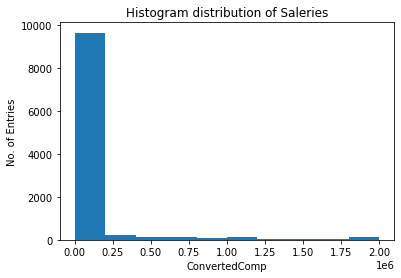

In [50]:
df['ConvertedComp'].plot(kind='hist')
plt.xlabel('ConvertedComp')
plt.ylabel('No. of Entries')
plt.title('Histogram distribution of Saleries')

### Scatter Plots

Text(0.5, 1.0, 'scatter plot of Age and Work Week Hours')

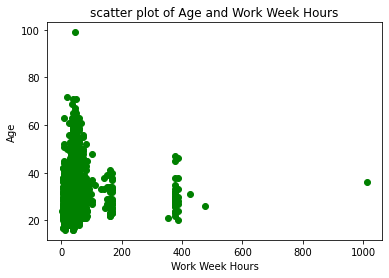

In [52]:
plt.scatter(df['WorkWeekHrs'],df['Age'],c='green')
plt.xlabel('Work Week Hours')
plt.ylabel('Age')
plt.title('scatter plot of Age and Work Week Hours')

### Pie Charts

<AxesSubplot:ylabel='Respondent'>

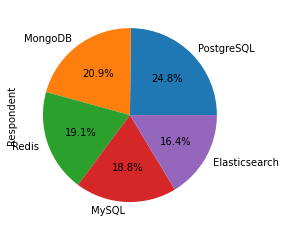

In [59]:
# pie chart of the top 5 databases that respondents wish to learn next year

df_grp=df.groupby(['DatabaseDesireNextYear'],as_index=False).count()
df_grp.sort_values(['Respondent'],ascending=False,inplace=True)
df_pie=df_grp.head()
df_pie.set_index('DatabaseDesireNextYear',inplace=True)
df_pie['Respondent'].plot(kind='pie',autopct='%1.1f%%')